In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

2025-06-23 17:21:08.600424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750679468.691383   17750 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750679468.717013   17750 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750679468.923232   17750 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750679468.923263   17750 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750679468.923265   17750 computation_placer.cc:177] computation placer alr

In [2]:
TRAIN_DIR = 'horse-or-human'
VAL_DIR = 'validation-horse-or-human'

train_horse_dir = os.path.join(TRAIN_DIR, 'horses')
train_human_dir = os.path.join(TRAIN_DIR, 'humans')

validation_horse_dir = os.path.join(VAL_DIR, 'horses')
validation_human_dir = os.path.join(VAL_DIR, 'humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

In [3]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


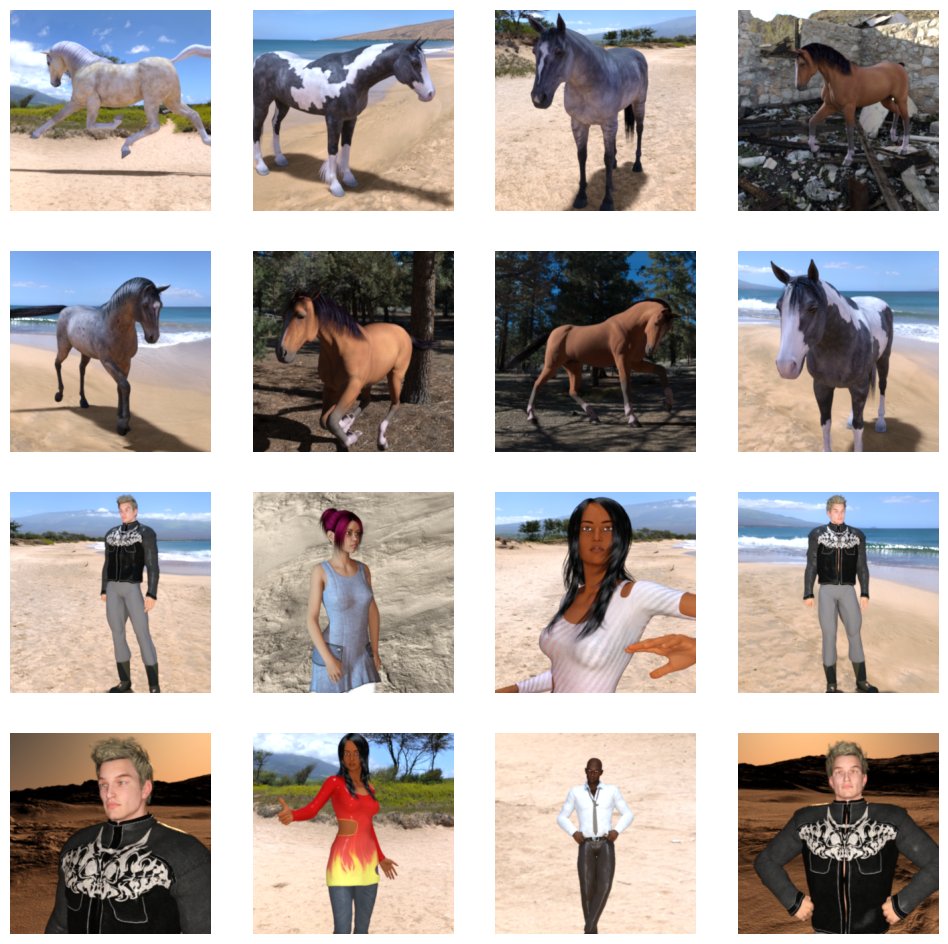

In [4]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)
next_horse_pix = [os.path.join(train_horse_dir, fname)
                 for fname in random.sample(train_horse_names, k=8)]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in random.sample(train_human_names, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [5]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.999:
            self.model.stop_training = True
            print("\nReached 99.9% accuracy so cancelling training!")

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2025-06-23 17:21:14.258706: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-06-23 17:21:14.326871: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160563200 exceeds 10% of free system memory.
2025-06-23 17:21:14.437193: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160563200 exceeds 10% of free system memory.
2025-06-23 17:21:14.533942: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160563200 exceeds 10% of free system memory.


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 78400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    40,141,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,165,409 (153.22 MB)

 Trainable params: 40,165,409 (153.22 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(300, 300),
    batch_size=32,
    label_mode='binary'
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(300, 300),
    batch_size=32,
    label_mode='binary'
    )

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [10]:
rescale_layer = tf.keras.layers.Rescaling(1./255)

train_dataset_scaled = train_dataset.map(lambda image, label: (rescale_layer(image), label))
validation_dataset_scaled = validation_dataset.map(lambda image, label: (rescale_layer(image), label))

In [11]:

history = model.fit(
train_dataset,
validation_data=validation_dataset,
epochs=5,
callbacks=[EarlyStoppingCallback()]
)

Epoch 1/5


2025-06-23 17:21:15.445226: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160563200 exceeds 10% of free system memory.
2025-06-23 17:21:15.880775: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160563200 exceeds 10% of free system memory.


33/33 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6983 - loss: 927.8362 - val_accuracy: 0.7031 - val_loss: 5.0682
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9936 - loss: 0.0640 - val_accuracy: 0.8359 - val_loss: 2.9378
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9691 - loss: 3.8409 - val_accuracy: 0.5547 - val_loss: 14.7754
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7440 - loss: 25.3629 - val_accuracy: 0.8438 - val_loss: 2.0025
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9920 - loss: 0.0307 - val_accuracy: 0.8359 - val_loss: 2.9152


In [12]:
loss, accuracy = model.evaluate(validation_dataset)
print(f"\n🎯 Final Validation Accuracy: {accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step - accuracy: 0.8362 - loss: 2.8999

🎯 Final Validation Accuracy: 83.59%
